<a href="https://colab.research.google.com/github/Manoharjha333/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded in 2008 by Deepinder Goyal and Pankaj Chaddha. Zomato provides restaurant information, menus and user-reviews, and also offers food delivery options from partner restaurants in select cities. India is quite famous for the diverse multi-cuisine available in a large number of restaurants and hotel resorts, which reminds of unity in diversity. The restaurant business is growing significantly in India. Most Indians are loving the idea of eating restaurant food, whether it's eating out or ordering food. An increasing number of restaurants in every state of India are going to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. Therefore, this project focuses on analyzing Zomato restaurant data from each city in India.

This project focuses on customers and company, you have to analyze the sentiments of customer reviews in the data and draw some useful conclusions in the form of visualization. Apart from this, Zomato restaurants will also be grouped into different segments. Data is visualized because it becomes easier to analyze the data quickly. The analysis also solves some business cases which can directly help the customers to find the best restaurants in their locality and can help the company to move ahead and work on the areas in which they are currently lagging behind. It may help to divide the restaurant into sections. Additionally the data contains valuable information about dishes and costs that can be used in cost vs benefit analysis The data can be used for sentiment analysis. Additionally reviewers' metadata can be used to identify critics in the industry.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Manoharjha333/Zomato-Restaurant-Clustering-And-Sentiment-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

Zomato which is an Indian restaurant and food delivery start-up takes orders through online mode and delivers food items to people's doorsteps. We have some data of that which is from Hyderabad. In that data, we have to analyze it by applying the algorithm of Unsupervised ML, in which we have to understand the sentiments of the customers and based on the information about cuisine, cost and customer reviews, we have to find out whether the customers are trying to find the best restaurant in their area. That no. So that the company can be helped in development and improvement in the food industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import missingno as msno

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset

meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look
meta_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
meta_df.tail(5)

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [6]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [7]:
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
meta_df.shape

(105, 6)

In [9]:
review_df.shape

(10000, 7)

### Dataset Information

In [10]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
len(meta_df[meta_df.duplicated()])

0

In [13]:
len(review_df[review_df.duplicated()])

36

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
print(meta_df.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [15]:
print(review_df.isnull().sum())

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

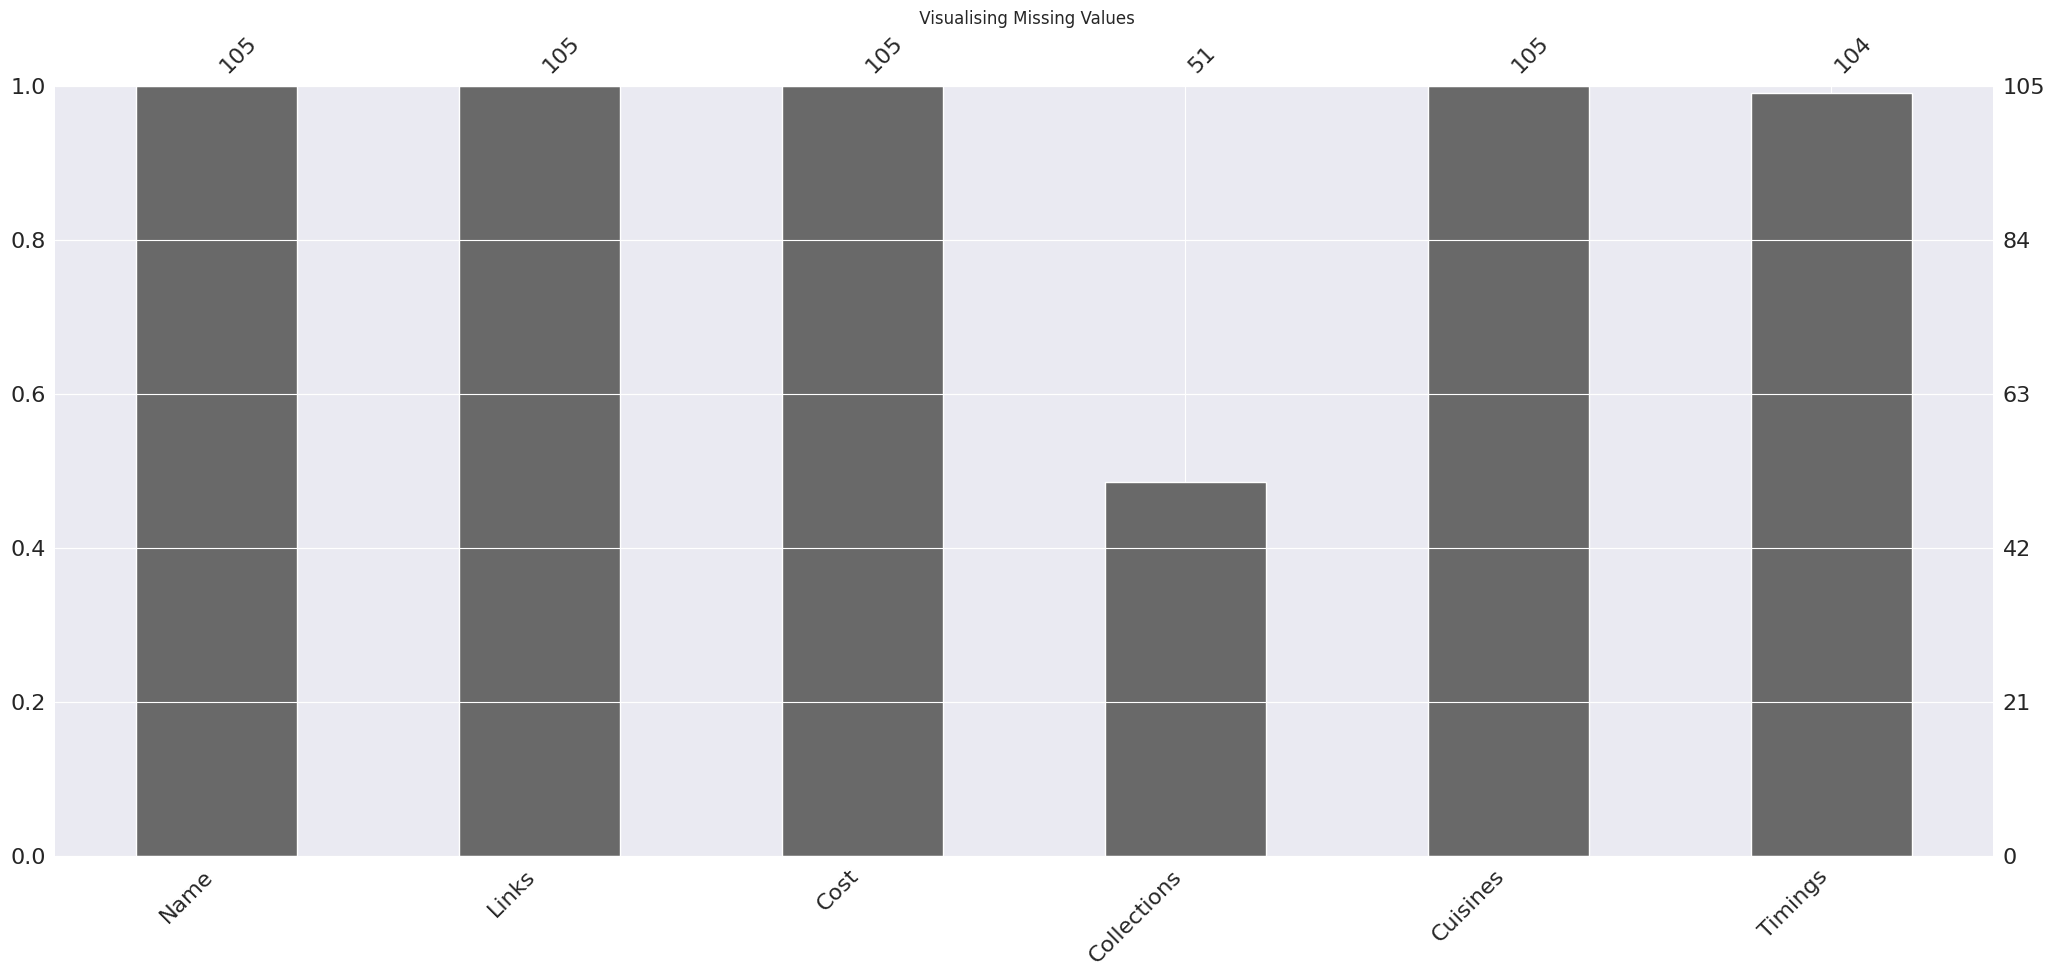

In [16]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
msno.bar(meta_df)
plt.title(" Visualising Missing Values")

Text(0.5, 1.0, ' Visualising Missing Values')

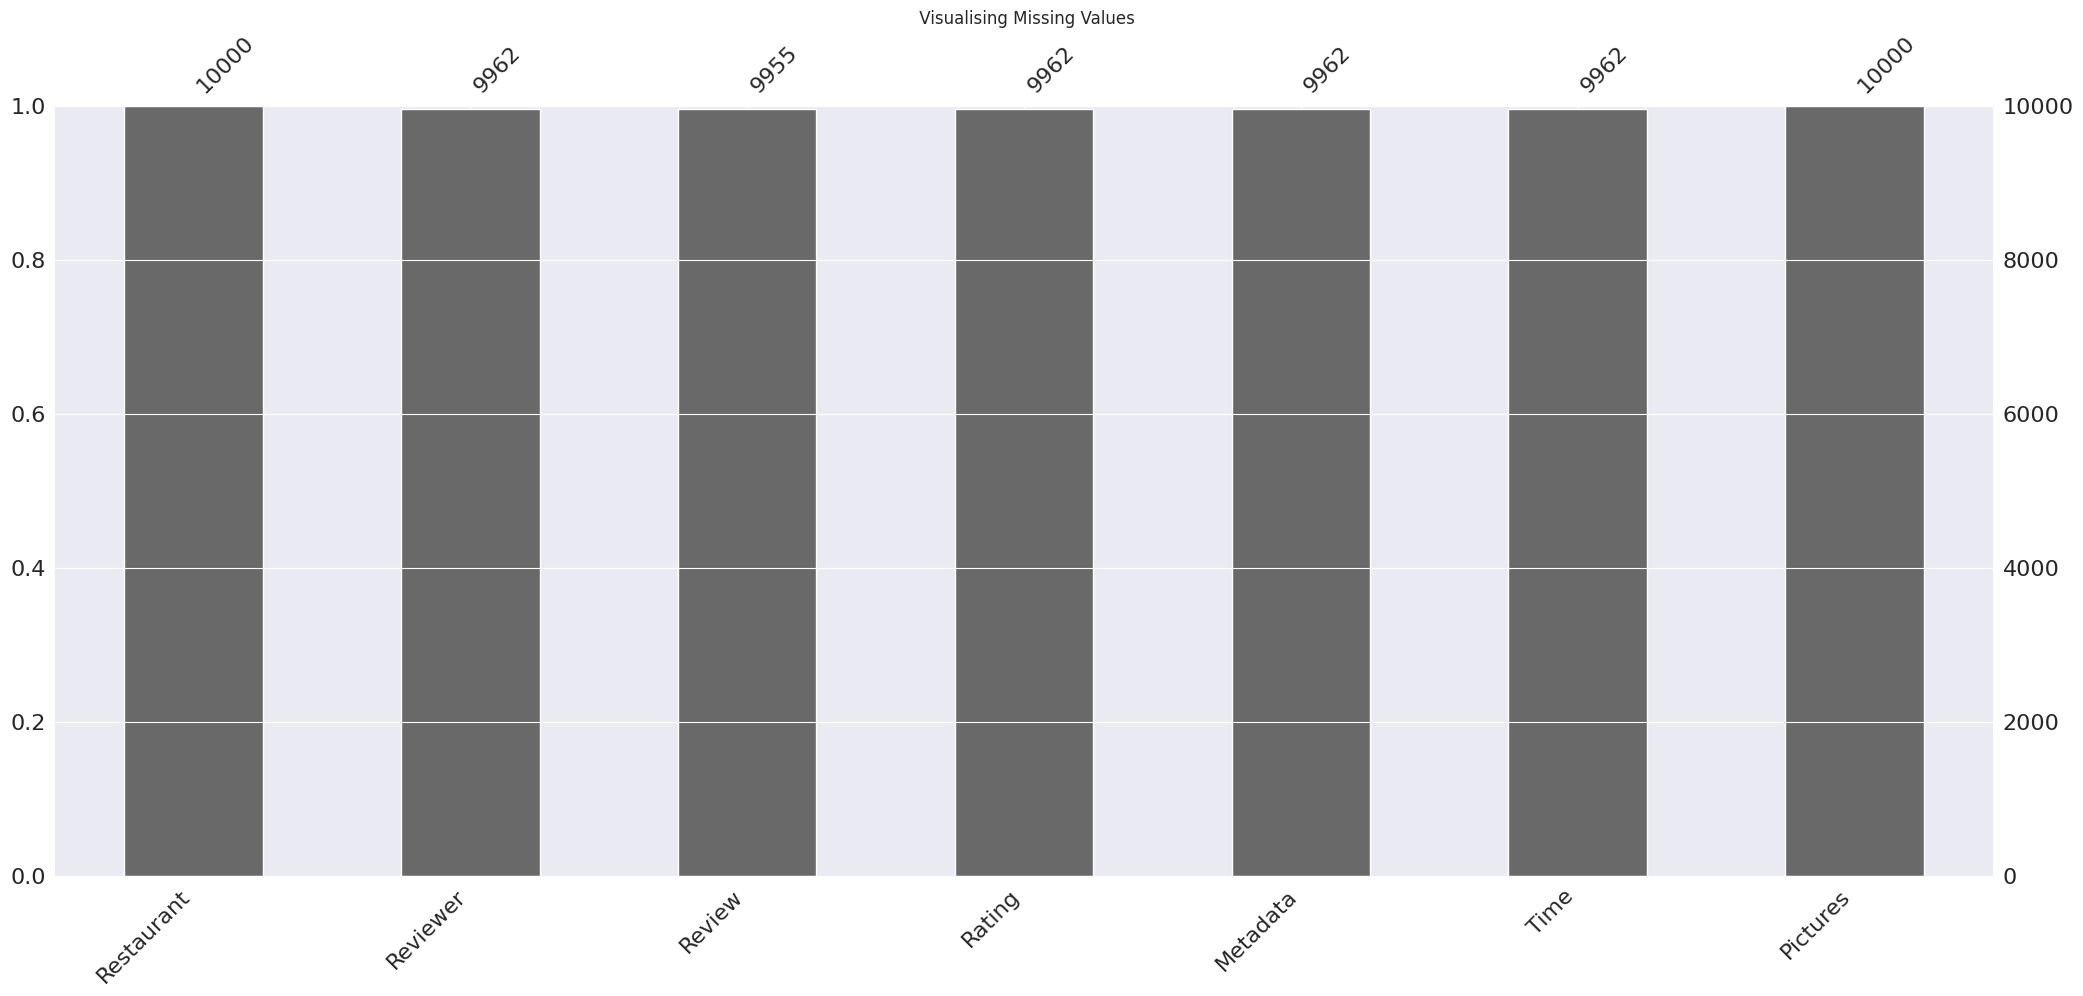

In [17]:
plt.figure(figsize=(12,6))
msno.bar(review_df)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Answer Here

This is data from a Zomato restaurant, which has 10105 rows and 13 columns. In this, all the data comes in type object, only one is in int. 36 Duplicate Values in review dataset and both has missing values.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [19]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [20]:
# Dataset Describe
meta_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [21]:
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

Answer Here

**<h3>Restaurant Data</h3>**


**Name:** Name of Restaurants

**Links URL:** Links of Restaurants

**Cost:** Per person estimated cost of dining

**Collection:** Tagging of Restaurants wrt. Zomato
categories

**Cuisines:** Cuisines served by restaurants

**Timings:** Restaurant timings
<br>
<br>

**<h3>Review Data**


**Reviewer:** Name of the reviewer

**review:** Review text

**Rating:** Rating provided

**MetaData:** Reviewer metadata-No of reviews and
followers

**Time:** Date and Time of Review

**Pictures:** No of pictures posted with review

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
meta_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [23]:
review_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.

#creating copy of both the data
meta = meta_df.copy()
review = review_df.copy()

In [25]:
# rename column
meta_df.rename(columns={'Name': 'Restaurant'}, inplace=True)

In [26]:
#cost checking values
meta['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [27]:
# changing the data type of the cost function
meta['Cost'] = meta['Cost'].str.replace(",","").astype('int64')

In [28]:
#count Rating
review_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [29]:
# Drop unnecessary columns
columns_to_drop = ['Links', 'Collections', 'Timings']
meta_df = meta_df.drop(columns=columns_to_drop, axis=1)

In [30]:
#replacing the value 'Like'
review_df.loc[review_df['Rating']=='Like']=1

In [31]:
# Filling missing values in the Rating column
review_df['Rating'].fillna(review_df['Rating'].median(),inplace=True)

In [32]:
# Extract numerical values using regular expressions
review_df['User_Done_Rating'] = review_df['Metadata'].str.extract(r'(\d+) Reviews')
review_df['User_Done_Follow'] = review_df['Metadata'].str.extract(r'(\d+) Followers')

# Drop a column
column_to_drop = 'Metadata'
review_df = review_df.drop(column_to_drop, axis=1)

# Fill NaN values in column with 1
column_to_fill = 'User_Done_Rating'
value_to_fill = 1
review_df[column_to_fill].fillna(value_to_fill, inplace=True)

# Fill NaN values in column with 1
column_fill = 'User_Done_Follow'
value_fill = 1
review_df[column_fill].fillna(value_fill, inplace=True)


# Display the DataFrame with the extracted values
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,User_Done_Rating,User_Done_Follow
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,5/24/2019 21:37,0,3,2


In [33]:
review_df['Review'] = review_df['Review'].astype(str)

In [34]:
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df = review_df.drop(['Time'], axis =1)


# Convert float to int in 'Year', 'Month', 'Hour', column
review_df['Year'] = pd.to_numeric(review_df['Year'], errors='coerce').astype('Int64')
review_df['Month'] = pd.to_numeric(review_df['Month'], errors='coerce').astype('Int64')
review_df['Hour'] = pd.to_numeric(review_df['Hour'], errors='coerce').astype('Int64')

review_df.head(5)

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,0,1,2,2019,5,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,0,3,2,2019,5,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,0,2,3,2019,5,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,0,1,1,2019,5,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,0,3,2,2019,5,21


In [35]:
review_df['Year'].value_counts()


2018    4903
2019    4802
2017     213
2016      43
1970       1
Name: Year, dtype: Int64

In [36]:
review_df['Month'].value_counts()


5     1541
7     1331
4     1247
3     1065
2      719
8      677
1      653
9      645
10     629
12     594
11     569
6      292
Name: Month, dtype: Int64

In [37]:
review_df['Hour'].value_counts()

22    968
21    877
23    804
14    776
20    714
15    645
13    580
16    549
19    522
0     510
17    480
12    459
18    438
1     313
11    308
10    229
9     171
2     167
8     134
3     102
7      78
4      55
6      44
5      39
Name: Hour, dtype: Int64

In [38]:
review_df['Rating'] = review_df['Rating'].astype(float).round().astype(int)


In [39]:
# Drop rows with missing values in the 'Year' column
review_df.dropna(subset=['Year'], inplace=True)

In [40]:
# Split the 'Cuisines' column into individual cuisines
meta_df['Cuisine_List'] = meta_df['Cuisines'].str.split(', ')

# Explode the 'Cuisine_List' column to create new rows for each cuisine
meta_df = meta_df.explode('Cuisine_List')


# Display the updated DataFrame
meta_df

,Restaurant,Cost,Cuisines,Cuisine_List
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",Chinese
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",Continental
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",Kebab
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",European
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",South Indian
...,...,...,...,...
103,Wich Please,250,Fast Food,Fast Food
104,Republic Of Noodles - Lemon Tree Hotel,"1,700","Thai, Asian, Chinese, Malaysian",Thai
104,Republic Of Noodles - Lemon Tree Hotel,"1,700","Thai, Asian, Chinese, Malaysian",Asian
104,Republic Of Noodles - Lemon Tree Hotel,"1,700","Thai, Asian, Chinese, Malaysian",Chinese


In [41]:
import pandas as pd

# 'Cuisine_List' is the column with text data
# Replace 'Cuisine_List' with your actual column name if it's different
cuisine_counts = meta_df['Cuisine_List'].value_counts()

# Create a new DataFrame with the counts
counts_df = pd.DataFrame({'Cuisine': cuisine_counts.index, 'Cuisine_Number': cuisine_counts.values})

# Merge the counts back to the original DataFrame based on the 'Cuisine' column
meta_df = pd.merge(meta_df, counts_df, how='left', left_on='Cuisine_List', right_on='Cuisine')

# Drop the extra 'Cuisine' column if needed
meta_df = meta_df.drop('Cuisine', axis=1)

# Display the updated DataFrame
meta_df


,Restaurant,Cost,Cuisines,Cuisine_List,Cuisine_Number
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",Chinese,43
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",Continental,21
2,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",Kebab,6
3,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",European,4
4,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",South Indian,9
...,...,...,...,...,...
308,Wich Please,250,Fast Food,Fast Food,15
309,Republic Of Noodles - Lemon Tree Hotel,"1,700","Thai, Asian, Chinese, Malaysian",Thai,3
310,Republic Of Noodles - Lemon Tree Hotel,"1,700","Thai, Asian, Chinese, Malaysian",Asian,15
311,Republic Of Noodles - Lemon Tree Hotel,"1,700","Thai, Asian, Chinese, Malaysian",Chinese,43


In [42]:
# Drop a column
meta_df = meta_df.drop('Cuisines', axis=1)

meta_df.head(10)

,Restaurant,Cost,Cuisine_List,Cuisine_Number
0,Beyond Flavours,800,Chinese,43
1,Beyond Flavours,800,Continental,21
2,Beyond Flavours,800,Kebab,6
3,Beyond Flavours,800,European,4
4,Beyond Flavours,800,South Indian,9
5,Beyond Flavours,800,North Indian,61
6,Paradise,800,Biryani,16
7,Paradise,800,North Indian,61
8,Paradise,800,Chinese,43
9,Flechazo,"1,300",Asian,15


In [43]:
# Merge datasets based on 'Restaurant' column
meta_df = pd.merge(meta_df, review_df[['Restaurant', 'Year', 'Rating']], on='Restaurant', how='left')

# Display the result
meta_df.head(2)


,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating
0,Beyond Flavours,800,Chinese,43,2019,5.0
1,Beyond Flavours,800,Chinese,43,2019,5.0


In [44]:
missing_values = meta_df['Year'].isnull()

# If you want to count the number of missing values
missing_count = missing_values.sum()

missing_count

12

In [45]:
missing_value = meta_df['Rating'].isnull()
# count the number of missing values
missing_counts = missing_value.sum()
missing_counts

12

In [46]:
column1 = 'Year'
column2 = 'Rating'

# Calculate the medians for each column
median_value1 = meta_df[column1].median()
median_value2 = meta_df[column2].median()

# Fill missing values with the medians
meta_df[column1].fillna(median_value1, inplace=True)
meta_df[column2].fillna(median_value2, inplace=True)

# Print the updated DataFrame
meta_df

,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating
0,Beyond Flavours,800,Chinese,43,2019,5.0
1,Beyond Flavours,800,Chinese,43,2019,5.0
2,Beyond Flavours,800,Chinese,43,2019,5.0
3,Beyond Flavours,800,Chinese,43,2019,5.0
4,Beyond Flavours,800,Chinese,43,2019,5.0
...,...,...,...,...,...,...
29999,Wich Please,250,Fast Food,15,2019,4.0
30000,Republic Of Noodles - Lemon Tree Hotel,"1,700",Thai,3,2019,4.0
30001,Republic Of Noodles - Lemon Tree Hotel,"1,700",Asian,15,2019,4.0
30002,Republic Of Noodles - Lemon Tree Hotel,"1,700",Chinese,43,2019,4.0


In [47]:
# Round float values to the nearest integer and convert to 'Int64' type
meta_df['Rating'] = pd.to_numeric(meta_df['Rating'], errors='coerce').fillna(0).astype(int)

# Print the updated DataFrame
meta_df


,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating
0,Beyond Flavours,800,Chinese,43,2019,5
1,Beyond Flavours,800,Chinese,43,2019,5
2,Beyond Flavours,800,Chinese,43,2019,5
3,Beyond Flavours,800,Chinese,43,2019,5
4,Beyond Flavours,800,Chinese,43,2019,5
...,...,...,...,...,...,...
29999,Wich Please,250,Fast Food,15,2019,4
30000,Republic Of Noodles - Lemon Tree Hotel,"1,700",Thai,3,2019,4
30001,Republic Of Noodles - Lemon Tree Hotel,"1,700",Asian,15,2019,4
30002,Republic Of Noodles - Lemon Tree Hotel,"1,700",Chinese,43,2019,4


In [48]:
# Convert 'Cost' to numeric, handle errors by setting errors='coerce'
meta_df['Cost'] = pd.to_numeric(meta_df['Cost'], errors='coerce')

In [49]:
#meta_df['Year'] = pd.to_datetime(meta_df['Year'])

### What all manipulations have you done and insights you found?

Answer Here.

First of all I copied both the datasets with different names. Then I checked the price values in a dataset and converted them to integers. Then I checked the value count of Rating. Dropped some unnecessary columns. After that I replaced the value. After that reviews and followers were extracted from a dataset. After that the datetime was extracted. Then checked the value count of some columns. Then split the text data into a dataset. Then added its value in a separate column. After add year and Rating column in meta_df dataset and find missing vale and fit median value and convert 'Cost' column to numeric.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

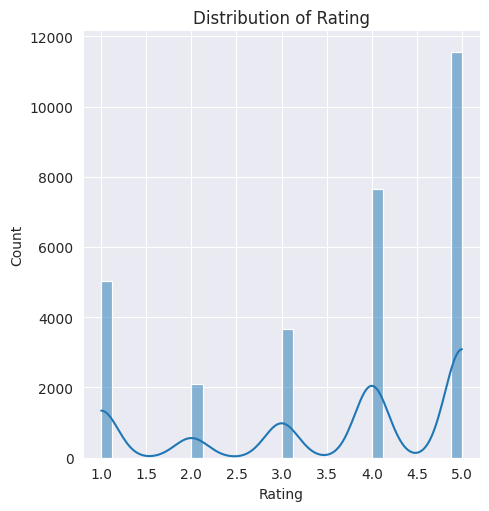

In [50]:
# Chart - 1 visualization code
# Create a distplot
sns.displot(data=meta_df, x='Rating', kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to know how the ratings are being distributed.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

This showed me that the highest number of 5 star ratings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
No such insight was found from this data which would have a negative impact on the business. Because almost all restaurants have good reviews

#### Chart - 2

<Figure size 3000x600 with 0 Axes>

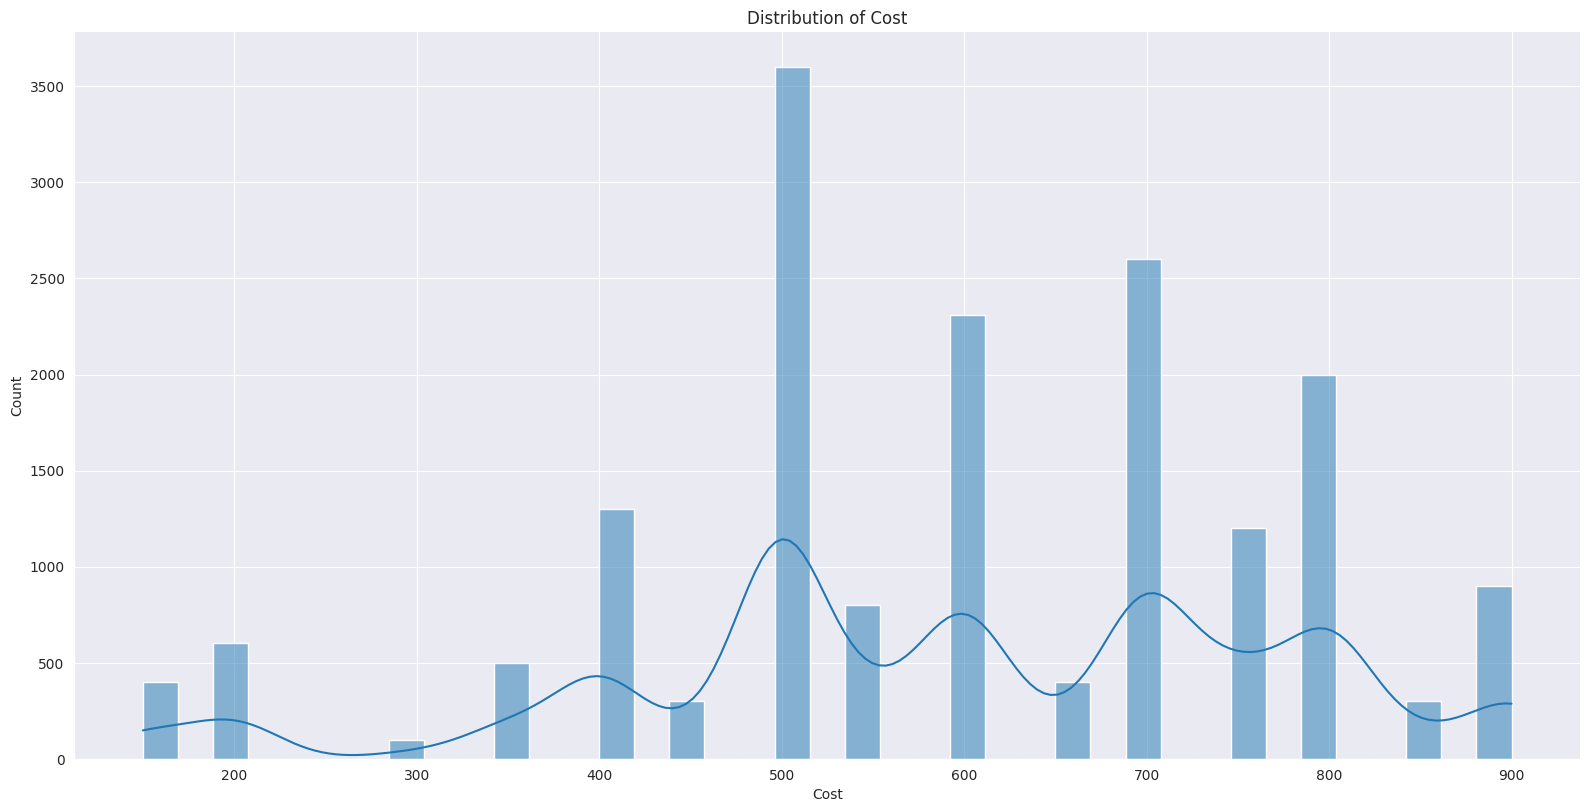

In [51]:
# Chart - 2 visualization code
# Create a distplot

# Set the figure size
plt.figure(figsize=(30, 6))

# Create a displot
sns.displot(data=meta_df, x='Cost', kde=True, height=8, aspect=2)

plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

From this data I had to find out at what price the highest orders were being placed.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this data I came to know that orders of Rs 500 are being received the most.

#### Chart - 3

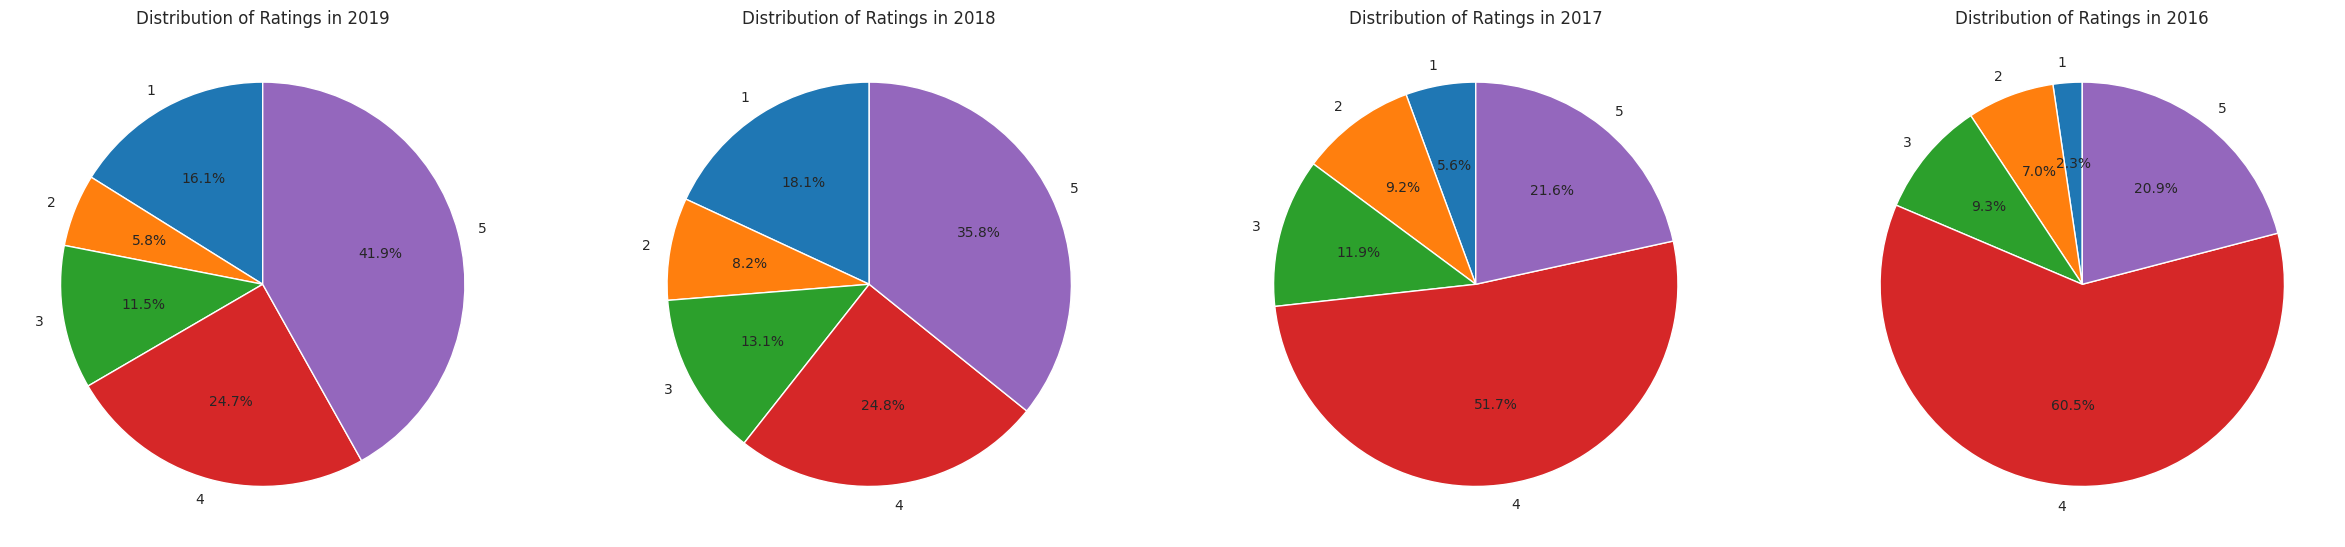

In [52]:
# Chart - 3 visualization code
# pie plot for Review_Year vs Rating
# Count the occurrences of each rating for each year

rating_counts_by_year = meta_df.groupby(['Year', 'Rating']).size().unstack(fill_value=0)

# Plot a pie chart for each year
fig, axes = plt.subplots(nrows=1, ncols=len(meta_df['Year'].unique()), figsize=(30, 10))

for i, year in enumerate(meta_df['Year'].unique()):
    axes[i].pie(rating_counts_by_year.loc[year], labels=rating_counts_by_year.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of Ratings in {year}')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This data is between 2016 and 2019. In this I had to find out in which year the difference in the ratings of the restaurants is visible.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

This showed me that good ratings are increasing every year. In 2016, there was 20% 5 star rating, whereas in 2019 it increased to 41%.

#### Chart - 4

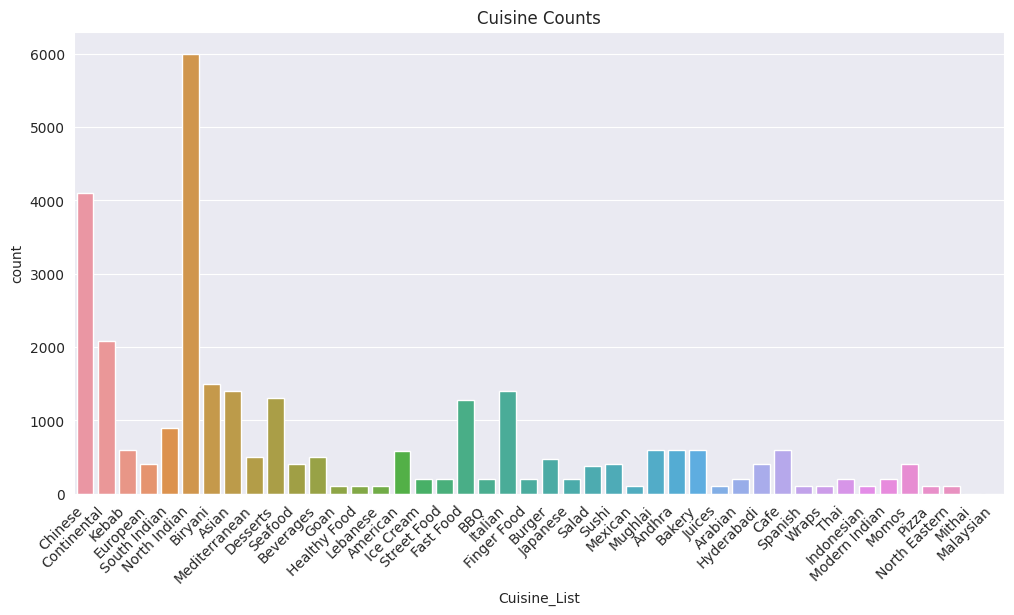

In [53]:
# Chart - 4 visualization code

plt.figure(figsize=(12, 6))
sns.countplot(data=meta_df, x='Cuisine_List')
plt.xticks(rotation=45, ha='right')
plt.title('Cuisine Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

With this I had to find out which dishes were in most demand.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this data I came to know that North Indian dishes are in highest demand.

#### Chart - 5

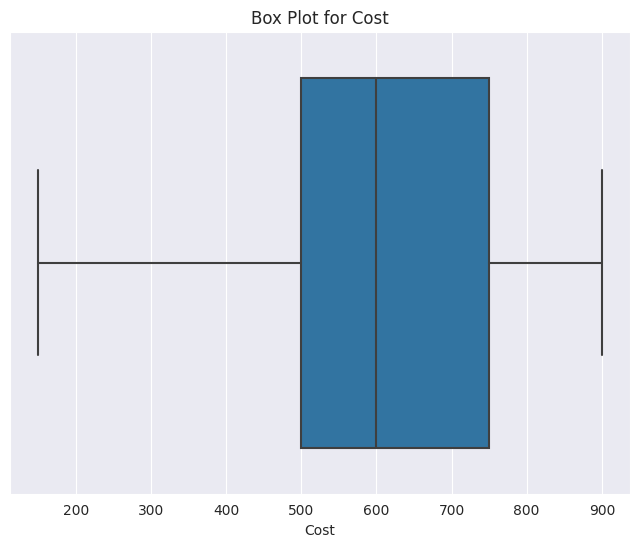

In [54]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(data=meta_df, x='Cost')
plt.title('Box Plot for Cost')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

With this I wanted to find out whether there are any outliers in this data price column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

When the data was visualized, no such outliers were seen.

#### Chart - 6

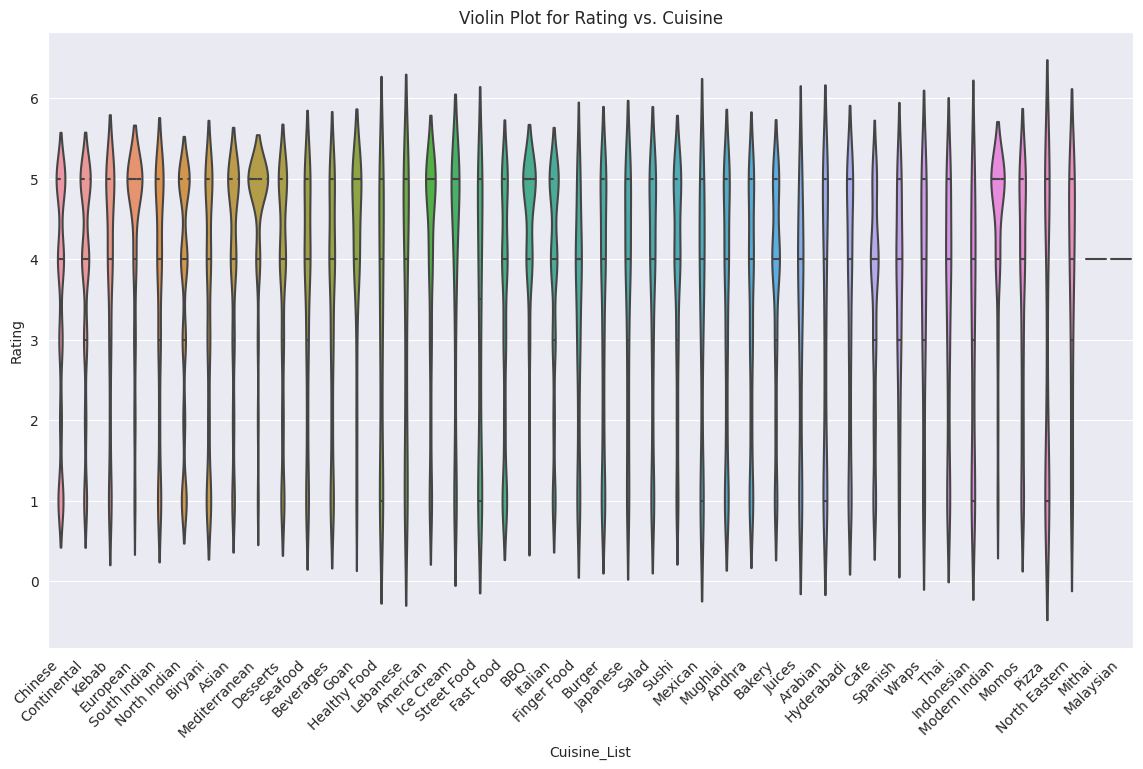

In [55]:
# Chart - 6 visualization code
plt.figure(figsize=(14, 8))
sns.violinplot(data=meta_df, x='Cuisine_List', y='Rating', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot for Rating vs. Cuisine')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to know what is the distribution of ratings according to Cuisine List.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
This shows that the distribution of 4 to 5 is the highest.

#### Chart - 7

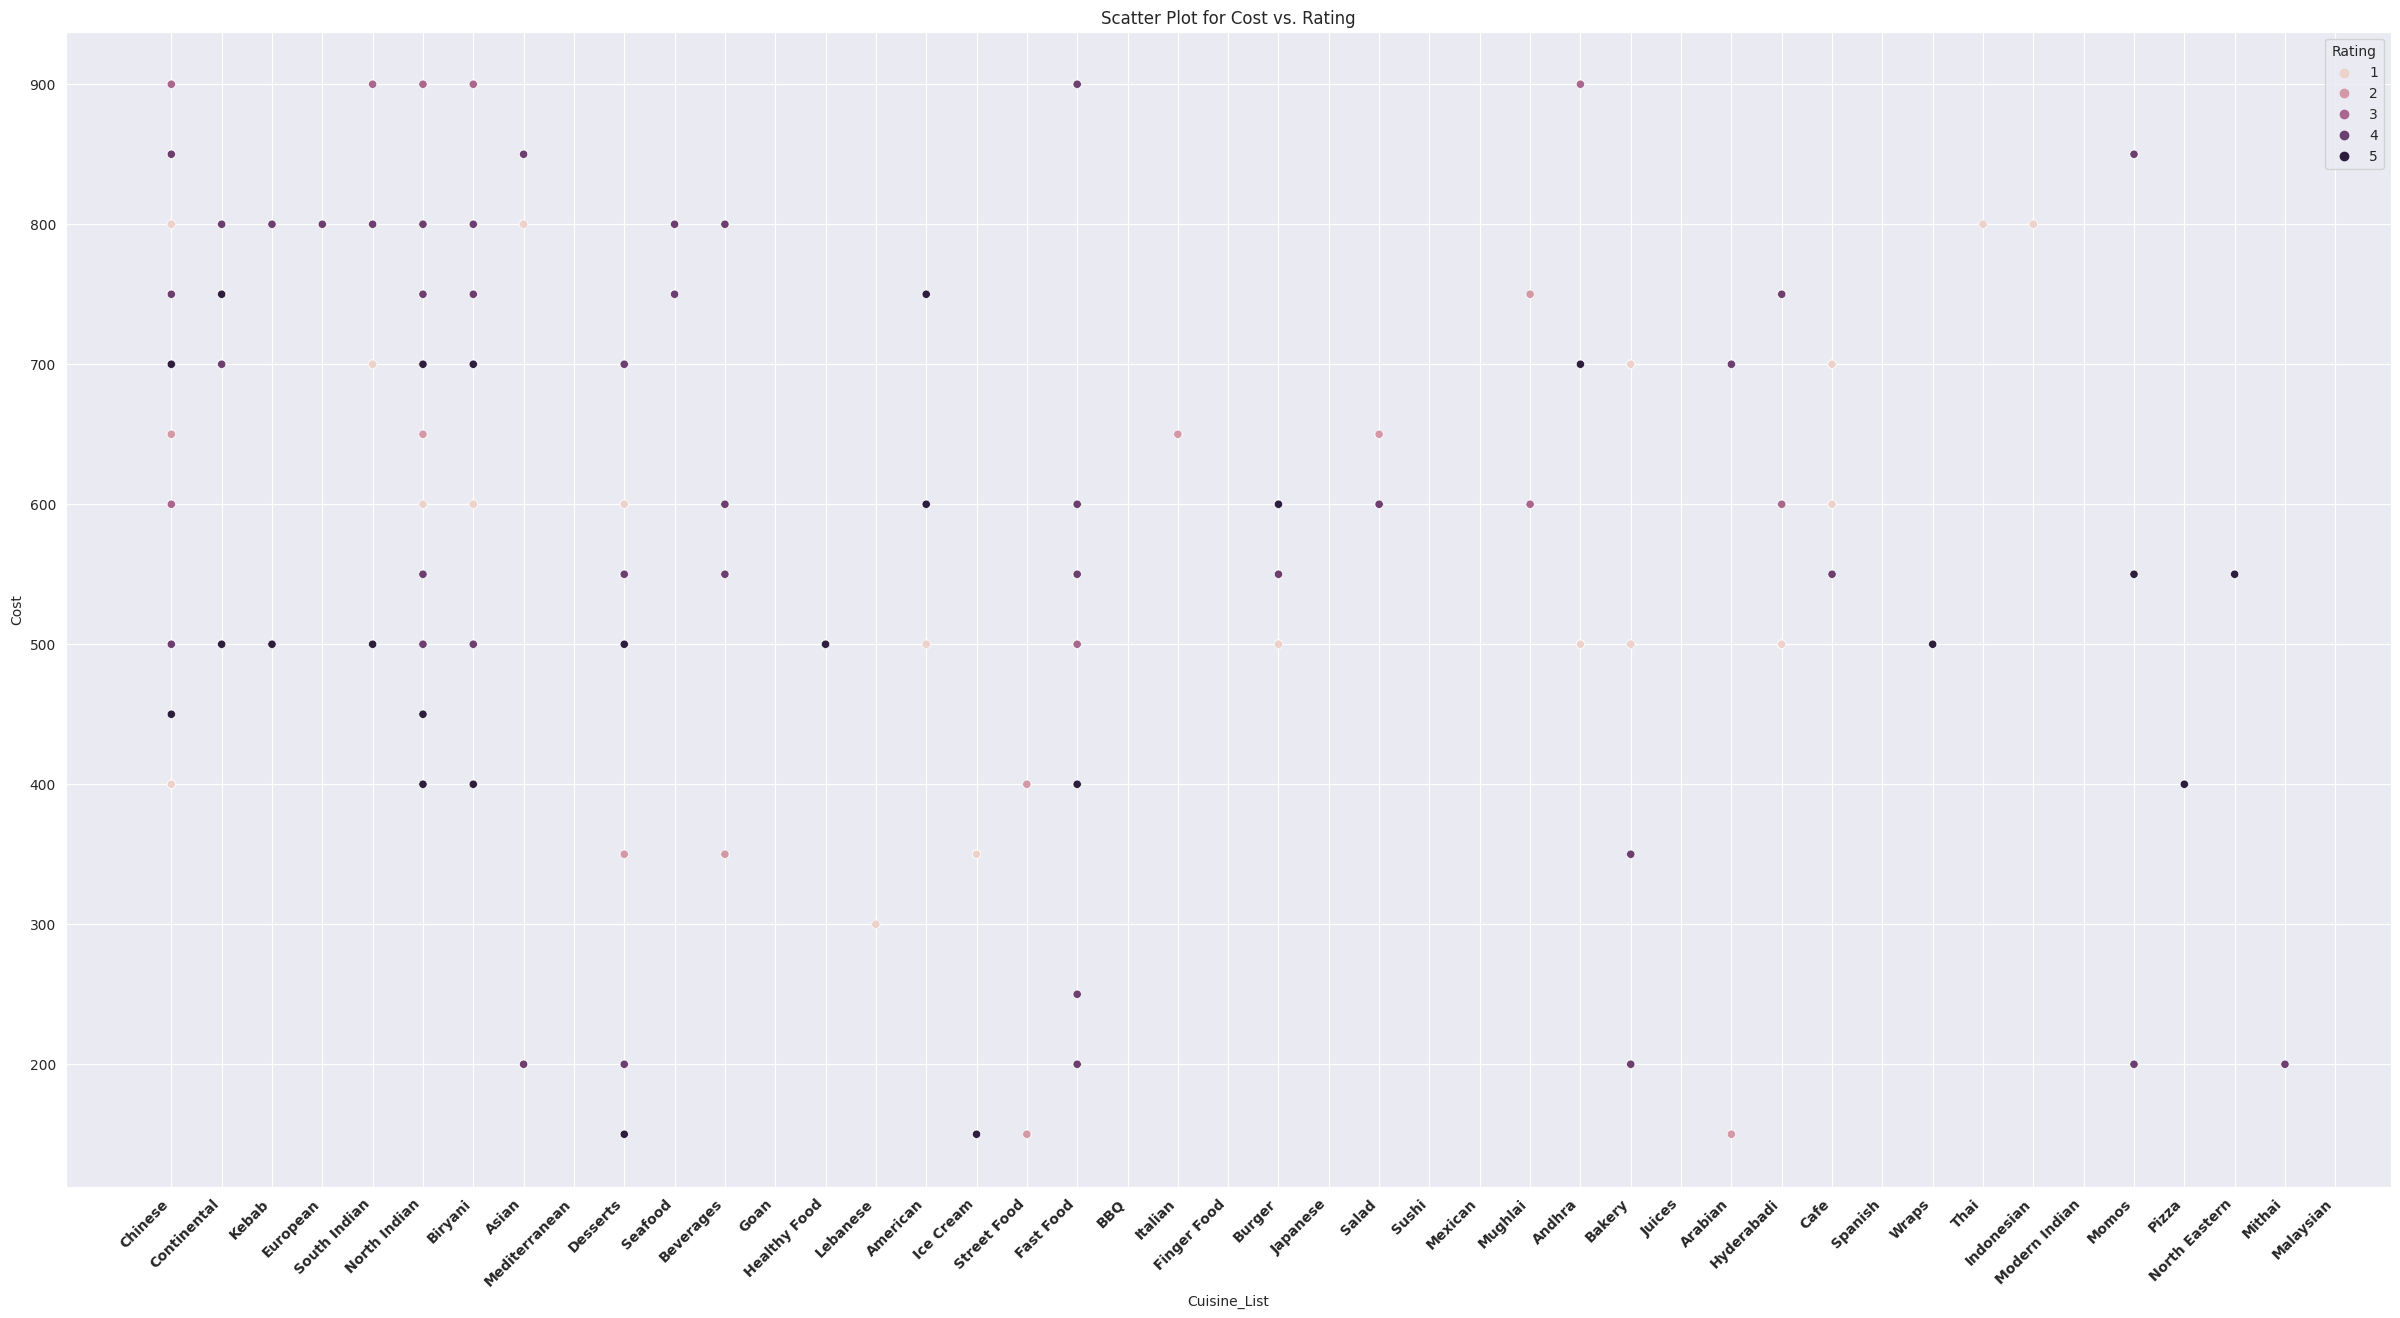

In [56]:
# Chart - 7 visualization code

plt.figure(figsize=(30, 15))
scatterplot = sns.scatterplot(data=meta_df, x='Cuisine_List', y='Cost', hue='Rating')

# Rotate x-axis labels and make them bold
scatterplot.set_xticklabels(scatterplot.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='bold')

plt.title('Scatter Plot for Cost vs. Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

From this data I can calculate Cost vs. According to Cuisine_List. Wanted to check the distribution of ratings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

People like Chinese and North Indian dishes very much and their cost is between Rs 400 to Rs 800.

#### Chart - 8

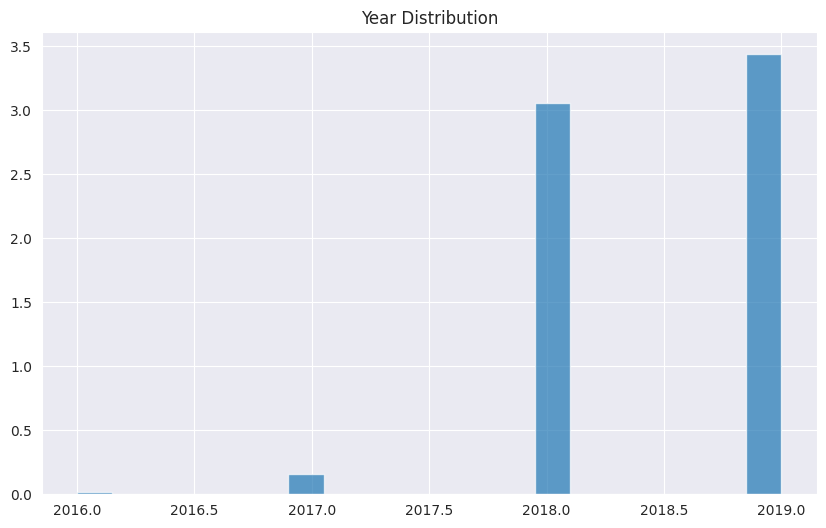

In [57]:
# Chart - 8 visualization code

plt.figure(figsize=(10, 6))
plt.hist(meta_df['Year'], bins=20, density=True, alpha=0.7)
plt.title('Year Distribution')
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

With this I had to check the year wise distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


Year wise distribution is increasing according to the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

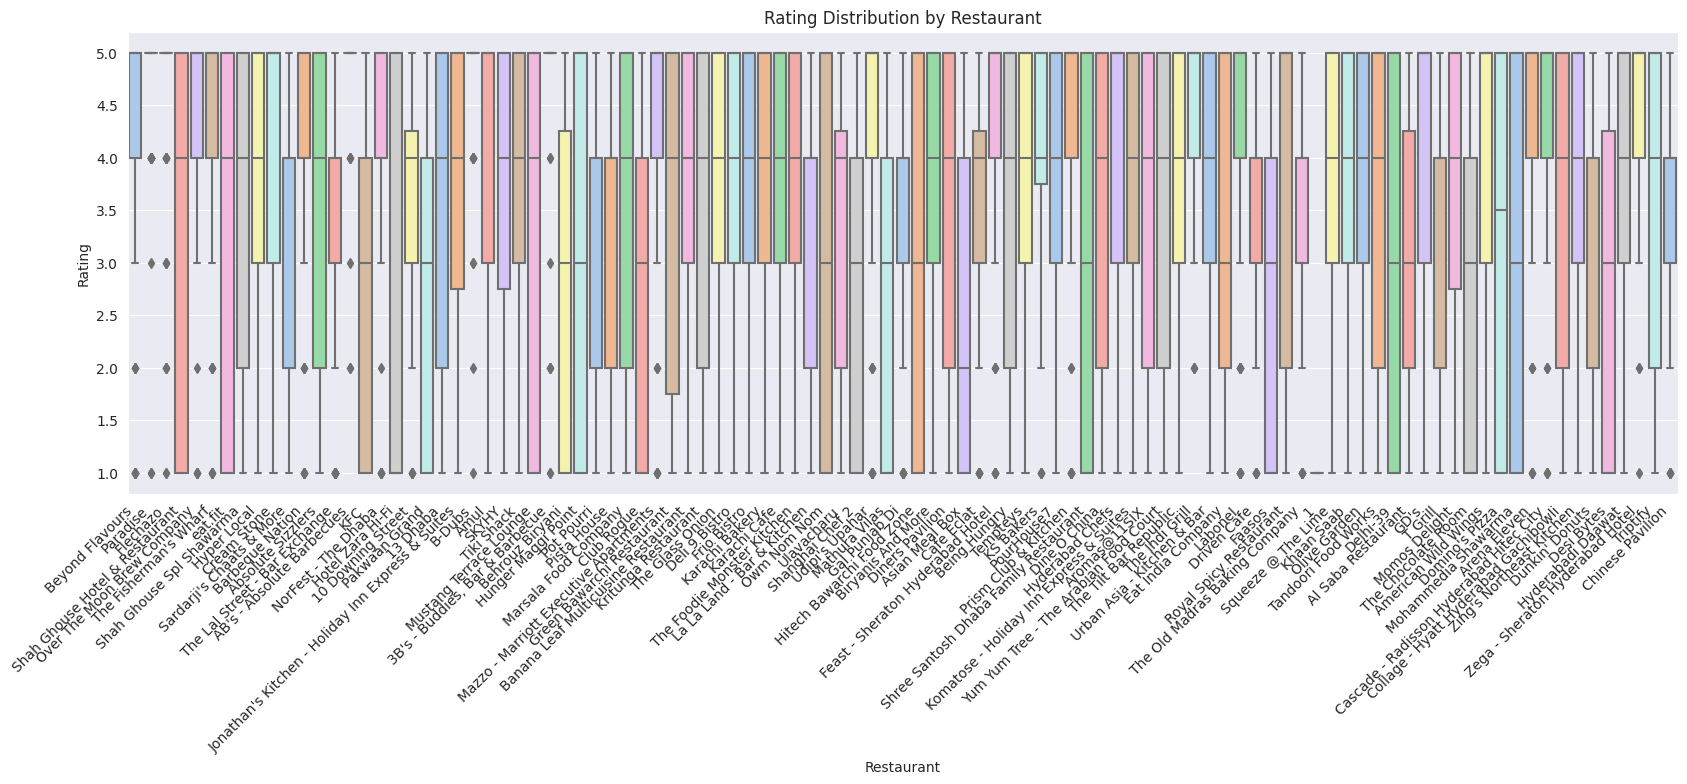

In [58]:
# Chart - 9 visualization code

# Plot a boxplot using seaborn
plt.figure(figsize=(20, 6))
sns.boxplot(x='Restaurant', y='Rating', data=review_df, palette='pastel')
plt.title('Rating Distribution by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

With this, I had to check the distribution of ratings according to restaurants.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There are some restaurants whose every drink is of 3 plus star and there are some restaurants whose every drink is of 1 star also.

#### Chart - 10

<Figure size 800x600 with 0 Axes>

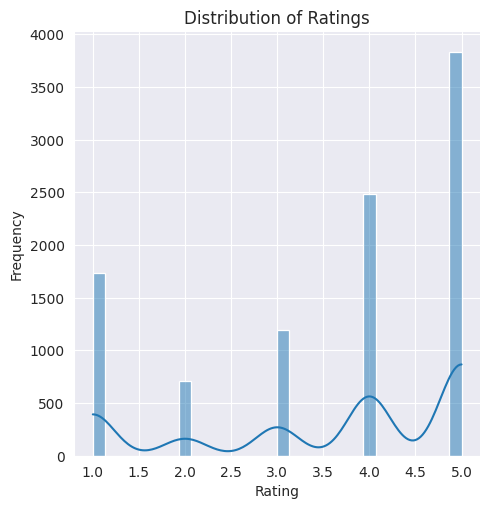

In [59]:
# Chart - 10 visualization code

plt.figure(figsize=(8, 6))
sns.displot(review_df['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

In this I had to check the rating and see what is the quantity of each rating from 1 to 5.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

This told me that 5 star rating is around 3800, 4 star rating is around 2500, 3 star rating is around 1200, 2 star rating is around 800 and 1 star rating is around 1800.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

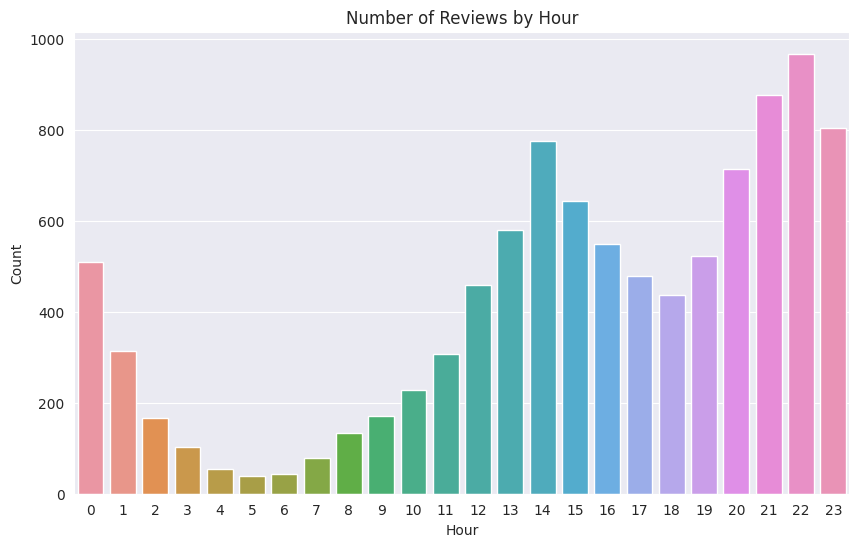

In [60]:
# Chart - 11 visualization code

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=review_df)
plt.title('Number of Reviews by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

Through this, I had to check the time of reviews and see in what maximum time the reviews are being done.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

This data shows that maximum number of people have given rating from 21 to 23.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

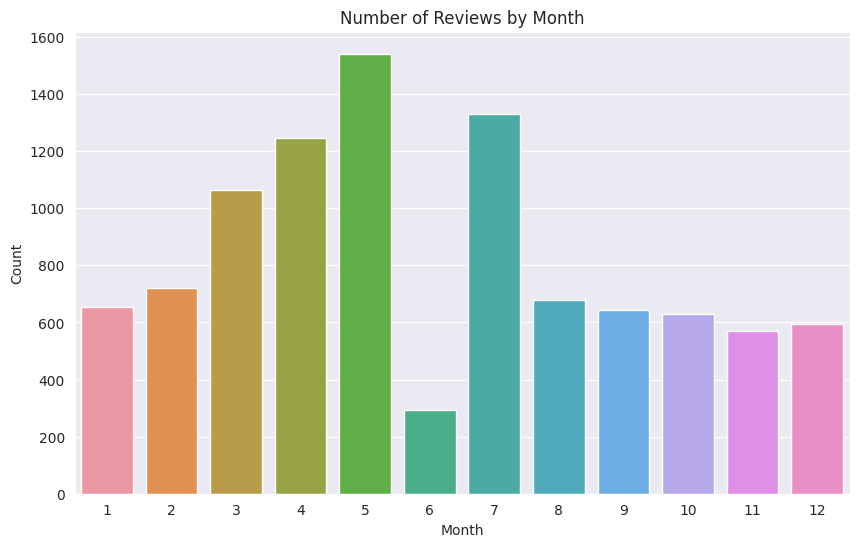

In [61]:
# Chart - 12 visualization code Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=review_df)
plt.title('Number of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This made me want to check the distribution of ratings according to the month.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

It is known that the highest number of people have given rating in the fifth and seventh month.

#### Chart - 13

In [109]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,0,1,2,2019,5,15,41
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,0,3,2,2019,5,14,27
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,0,2,3,2019,5,22,31
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,0,1,1,2019,5,22,28
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,0,3,2,2019,5,21,27


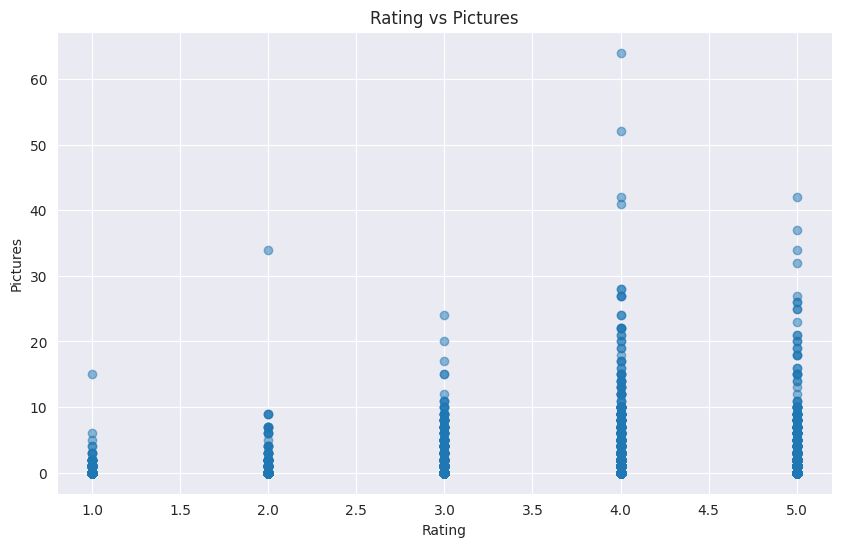

In [111]:
# Chart - 13 visualization code
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(review_df['Rating'], review_df['Pictures'], alpha=0.5)
plt.title('Rating vs Pictures')
plt.xlabel('Rating')
plt.ylabel('Pictures')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

From this I wanted to know whether there is any difference in the according rating of the picture or not?

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

There is a difference in the picture between 4 star and 5 star rating.

#### Chart - 14 - Correlation Heatmap

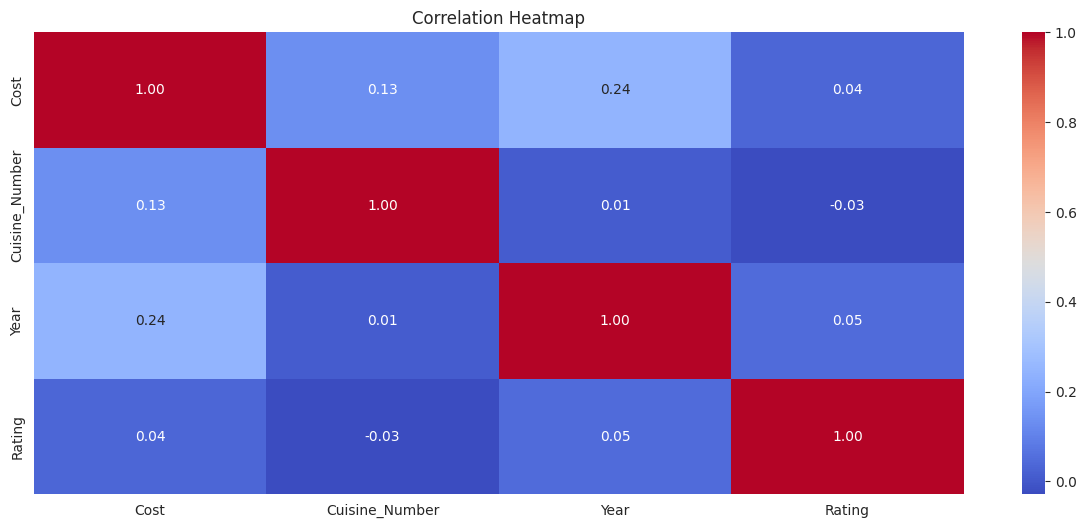

In [62]:
# Correlation Heatmap visualization code foe meta_df dataset

correlation_matrix = meta_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

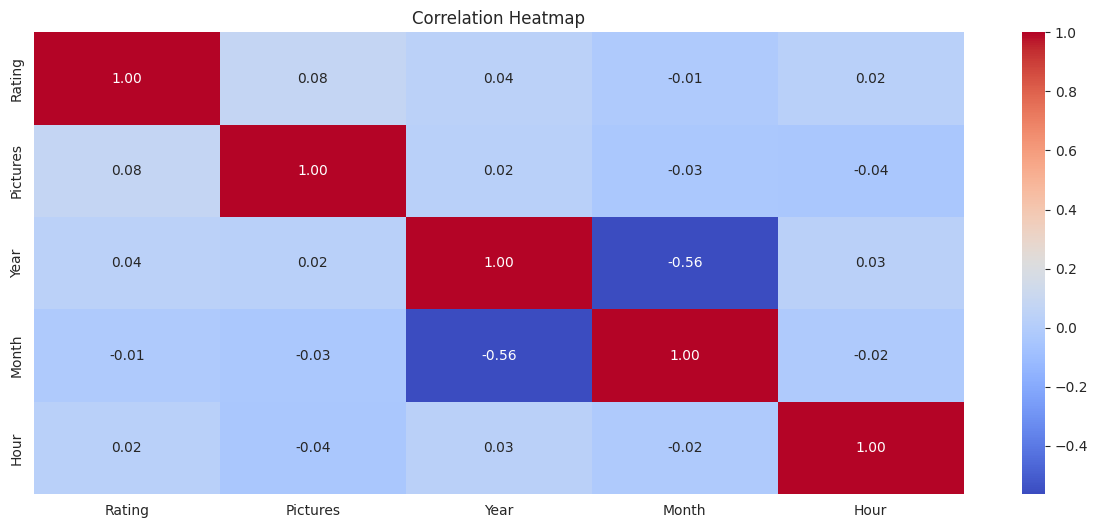

In [63]:
# Correlation Heatmap visualization code foe review_df dataset

correlation_matrix = review_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Because the relationship between the variables in the dataset was to be understood and no one can explain it better than the Correlation Heatmap.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The review_df dataset has the best correlation between pictures and ratings and the meta_df dataset has the best correlation between years and cost.

#### Chart - 15 - Pair Plot

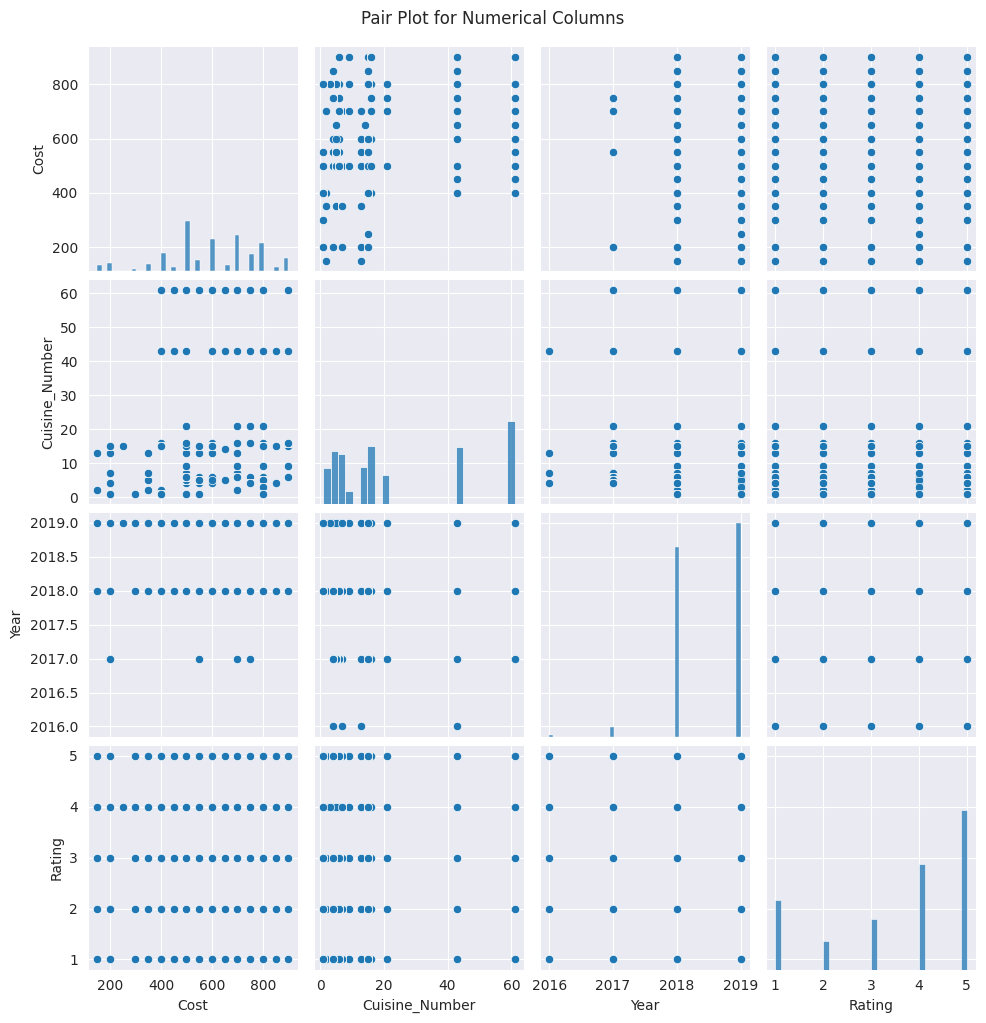

In [64]:
# Pair Plot visualization code meta_df dataset
sns.pairplot(meta_df[['Cost', 'Cuisine_Number', 'Year', 'Rating']])
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

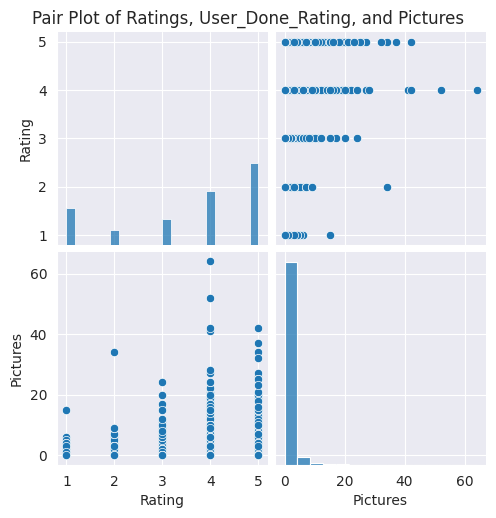

In [65]:
# Pair Plot visualization code review_df dataset

plt.figure(figsize=(15, 10))
sns.pairplot(review_df[['Rating', 'User_Done_Rating', 'Pictures']])
plt.suptitle('Pair Plot of Ratings, User_Done_Rating, and Pictures', y=1.02)
plt.show()


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

Hypothetical Statements:

Statement 1: Average Ratings are higher in the evening hours compared to the morning hours.

Statement 2: There is a significant correlation between the number of pictures uploaded and the user's done rating.

Statement 3: Reviews with a higher word count tend to have higher ratings.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Statement 1: Average Ratings in the Evening vs. Morning

Null Hypothesis (H0): There is no significant difference in average ratings between evening and morning hours.

Alternative Hypothesis (H1): Average ratings are higher in the evening compared to the morning.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Extract morning (6 AM - 12 PM) and evening (6 PM - 12 AM) data
morning_data = review_df[review_df['Hour'].between(6, 11)]
evening_data = review_df[review_df['Hour'].between(18, 23)]

# Perform t-test
t_stat, p_value = stats.ttest_ind(morning_data['Rating'], evening_data['Rating'])

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average ratings between morning and evening.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average ratings between morning and evening.")

print(f"P-Value for Statement 1: {p_value}")

Fail to reject the null hypothesis. There is no significant difference in average ratings between morning and evening.
P-Value for Statement 1: 0.6659495425037446


##### Which statistical test have you done to obtain P-Value?

Answer Here.

The code has performed an independent two-sample t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

Answer Here.

The specific statistical test chosen, the independent two-sample t-test, is appropriate when comparing the means of two independent groups to determine if there is a significant difference between them. In this case, the code compares the average ratings between the morning (6 AM - 12 PM) and evening (6 PM - 12 AM) data sets. The t-test is suitable for this scenario, especially when the distribution of the data is assumed to be approximately normal, and the samples are independent. The resulting p-value is then used to determine whether to reject the null hypothesis, which states that there is no significant difference in average ratings between morning and evening.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Statement 2: Correlation between Pictures and User_Done_Rating

Null Hypothesis (H0): There is no significant correlation between the number of pictures uploaded and user's done rating.

Alternative Hypothesis (H1): There is a significant correlation between the number of pictures uploaded and user's done rating.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
# Perform Pearson correlation
correlation_coefficient, p_value_corr = stats.pearsonr(review_df['Pictures'], review_df['User_Done_Rating'])

# Check the p-value
if p_value_corr < 0.05:
    print("Reject the null hypothesis. There is a significant correlation between Pictures and User_Done_Rating.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Pictures and User_Done_Rating.")
print(f"P-Value for Statement 2: {p_value_corr}")

Reject the null hypothesis. There is a significant correlation between Pictures and User_Done_Rating.
P-Value for Statement 2: 4.3977785264117616e-244


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Statement 3: Relationship between Word Count and Ratings

Null Hypothesis (H0): There is no significant relationship between the word count of reviews and the ratings.

Alternative Hypothesis (H1): Reviews with a higher word count tend to have higher ratings.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value

# Create a new column for word count
review_df['Word_Count'] = review_df['Review'].apply(lambda x: len(str(x).split()))

# Perform correlation between word count and ratings
correlation_wordcount, p_value_wordcount = stats.pearsonr(review_df['Word_Count'], review_df['Rating'])

# Check the p-value
if p_value_wordcount < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Word Count and Ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Word Count and Ratings.")
print(f"P-Value for Statement 3: {p_value_wordcount}")

Reject the null hypothesis. There is a significant relationship between Word Count and Ratings.
P-Value for Statement 3: 3.300001740603256e-05


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [69]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the dataset
missing_values = meta_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(meta_df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values:
 Restaurant            0
Cost              12689
Cuisine_List          0
Cuisine_Number        0
Year                  0
Rating                0
dtype: int64

Percentage of Missing Values:
 Restaurant         0.000000
Cost              42.291028
Cuisine_List       0.000000
Cuisine_Number     0.000000
Year               0.000000
Rating             0.000000
dtype: float64


In [70]:
# Check for missing values in the dataset
missing_value = review_df.isnull().sum()
print("Missing Value:\n", missing_value)
# Percentage of missing values
missing_percentages = (missing_value / len(review_df)) * 100
print("\nPercentages of Missing Values:\n", missing_percentages)


Missing Value:
 Restaurant          0
Reviewer            0
Review              0
Rating              0
Pictures            0
User_Done_Rating    0
User_Done_Follow    0
Year                0
Month               0
Hour                0
Word_Count          0
dtype: int64

Percentages of Missing Values:
 Restaurant          0.0
Reviewer            0.0
Review              0.0
Rating              0.0
Pictures            0.0
User_Done_Rating    0.0
User_Done_Follow    0.0
Year                0.0
Month               0.0
Hour                0.0
Word_Count          0.0
dtype: float64


In [71]:
# Remove rows with any missing values
review = review_df.dropna()
meta = meta_df.dropna()


In [72]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the dataset
missing_values = meta_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(meta_df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values:
 Restaurant            0
Cost              12689
Cuisine_List          0
Cuisine_Number        0
Year                  0
Rating                0
dtype: int64

Percentage of Missing Values:
 Restaurant         0.000000
Cost              42.291028
Cuisine_List       0.000000
Cuisine_Number     0.000000
Year               0.000000
Rating             0.000000
dtype: float64


In [73]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (e.g., using mean strategy)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
meta[['Cost']] = imputer.fit_transform(meta[['Cost']])


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [74]:
from scipy import stats


data = meta['Cost']

# Method 1: Identifying outliers using Z-scores
z_scores = np.abs(stats.zscore(data))
threshold = 3
outliers_zscore = np.where(z_scores > threshold)[0]

# Method 2: Identifying outliers using IQR (Interquartile Range)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = np.where((data < lower_bound) | (data > upper_bound))[0]

# Method 3: Imputation with median
median_value = np.median(data)
data_imputed = np.where((data < lower_bound) | (data > upper_bound), median_value, data)

# Method 4: Winsorizing
winsorized_data = np.clip(data, lower_bound, upper_bound)

# Method 5: Log Transformation
log_transformed_data = np.log1p(data)

# Method 6: Robust statistics (using median and MAD)
median_value_robust = np.median(data)
mad_value = stats.median_abs_deviation(data)
lower_bound_robust = median_value_robust - 3 * mad_value
upper_bound_robust = median_value_robust + 3 * mad_value
outliers_robust = np.where((data < lower_bound_robust) | (data > upper_bound_robust))[0]

# Print results
print("Outliers using Z-score:", outliers_zscore)
print("Outliers using IQR:", outliers_iqr)
print("Imputed data using median:", data_imputed)
print("Winsorized data:", winsorized_data)
print("Log-transformed data:", log_transformed_data)
print("Outliers using robust statistics:", outliers_robust)


Outliers using Z-score: []
Outliers using IQR: []
Imputed data using median: [800. 800. 800. ... 500. 500. 250.]
Winsorized data: 0        800.0
1        800.0
2        800.0
3        800.0
4        800.0
         ...  
29995    200.0
29996    500.0
29997    500.0
29998    500.0
29999    250.0
Name: Cost, Length: 17315, dtype: float64
Log-transformed data: 0        6.685861
1        6.685861
2        6.685861
3        6.685861
4        6.685861
           ...   
29995    5.303305
29996    6.216606
29997    6.216606
29998    6.216606
29999    5.525453
Name: Cost, Length: 17315, dtype: float64
Outliers using robust statistics: [ 3600  3601  3602 ... 17309 17310 17314]


In [75]:
meta.head(2)

,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating
0,Beyond Flavours,800.0,Chinese,43,2019,5
1,Beyond Flavours,800.0,Chinese,43,2019,5


In [76]:
review.head(2)

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,0,1,2,2019,5,15,41
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,0,3,2,2019,5,14,27


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [77]:
# Encode your categorical columns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Category' column
meta['Cuisine_LabelEncoded'] = label_encoder.fit_transform(meta['Cuisine_List'])
meta['Restaurant_LabelEncoded'] = label_encoder.fit_transform(meta['Restaurant'])

# Display the DataFrame
meta.head(5)


,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating,Cuisine_LabelEncoded,Restaurant_LabelEncoded
0,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
1,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
2,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
3,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
4,Beyond Flavours,800.0,Chinese,43,2019,5,9,11


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [78]:
# Expand Contraction
!pip install contractions
import pandas as pd
import contractions

# Function to expand contractions in a given text
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Restaurant' column
meta['Restaurant'] = meta['Restaurant'].apply(expand_contractions)
meta['Cuisine_List'] = meta['Cuisine_List'].apply(expand_contractions)

# Print the updated DataFrame
meta.head(5)


,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating,Cuisine_LabelEncoded,Restaurant_LabelEncoded
0,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
1,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
2,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
3,Beyond Flavours,800.0,Chinese,43,2019,5,9,11
4,Beyond Flavours,800.0,Chinese,43,2019,5,9,11


In [79]:
import pandas as pd
import contractions

# Function to expand contractions in a given text
def expand_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    else:
        return text


# Apply the function to the 'Restaurant' column
review['Restaurant'] = review['Restaurant'].apply(expand_contractions)
review['Reviewer'] = review['Reviewer'].apply(expand_contractions)
review['Review'] = review['Review'].apply(expand_contractions)

# Print the updated DataFrame
review.head(5)

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,0,1,2,2019,5,15,41
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,0,3,2,2019,5,14,27
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,0,2,3,2019,5,22,31
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,0,1,1,2019,5,22,28
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,0,3,2,2019,5,21,27


#### 2. Lower Casing

In [80]:
# Lower Casing
# Lowercase text columns
text_columns = ['Restaurant', 'Cuisine_List']
meta[text_columns] = meta[text_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Print the updated DataFrame
meta.head(5)

,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating,Cuisine_LabelEncoded,Restaurant_LabelEncoded
0,beyond flavours,800.0,chinese,43,2019,5,9,11
1,beyond flavours,800.0,chinese,43,2019,5,9,11
2,beyond flavours,800.0,chinese,43,2019,5,9,11
3,beyond flavours,800.0,chinese,43,2019,5,9,11
4,beyond flavours,800.0,chinese,43,2019,5,9,11


In [81]:
# Lowercase text columns
text_columns = ['Restaurant', 'Reviewer', 'Review']
review[text_columns] = review[text_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Print the updated DataFrame
review.head(5)

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,beyond flavours,rusha chakraborty,"the ambience was good, food was quite good . h...",5,0,1,2,2019,5,15,41
1,beyond flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening. s...,5,0,3,2,2019,5,14,27
2,beyond flavours,ashok shekhawat,a must try.. great food great ambience. thnx f...,5,0,2,3,2019,5,22,31
3,beyond flavours,swapnil sarkar,soumen das and arun was a great guy. only beca...,5,0,1,1,2019,5,22,28
4,beyond flavours,dileep,food is good.we ordered kodi drumsticks and ba...,5,0,3,2,2019,5,21,27


#### 3. Removing Punctuations

In [82]:
# Remove Punctuations
import string

# Function to remove punctuation from a given text
def remove_punctuation(text):
    if isinstance(text, str):
        # Using a regular expression to remove punctuation
        return text.translate(str.maketrans("", "", string.punctuation))
    else:
        return text

# Apply the function to text columns
text_columns = ['Restaurant', 'Cuisine_List']
meta[text_columns] = meta[text_columns].applymap(remove_punctuation)

# Print the updated DataFrame
meta.head(5)

,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating,Cuisine_LabelEncoded,Restaurant_LabelEncoded
0,beyond flavours,800.0,chinese,43,2019,5,9,11
1,beyond flavours,800.0,chinese,43,2019,5,9,11
2,beyond flavours,800.0,chinese,43,2019,5,9,11
3,beyond flavours,800.0,chinese,43,2019,5,9,11
4,beyond flavours,800.0,chinese,43,2019,5,9,11


In [83]:
# Remove Punctuations
import string

# Function to remove punctuation from a given text
def remove_punctuation(text):
    if isinstance(text, str):
        # Using a regular expression to remove punctuation
        return text.translate(str.maketrans("", "", string.punctuation))
    else:
        return text

# Apply the function to text columns
text_columns = ['Restaurant', 'Reviewer', 'Review']
review[text_columns] = review[text_columns].applymap(remove_punctuation)

# Print the updated DataFrame
review.head(5)

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,beyond flavours,rusha chakraborty,the ambience was good food was quite good had...,5,0,1,2,2019,5,15,41
1,beyond flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening se...,5,0,3,2,2019,5,14,27
2,beyond flavours,ashok shekhawat,a must try great food great ambience thnx for ...,5,0,2,3,2019,5,22,31
3,beyond flavours,swapnil sarkar,soumen das and arun was a great guy only becau...,5,0,1,1,2019,5,22,28
4,beyond flavours,dileep,food is goodwe ordered kodi drumsticks and bas...,5,0,3,2,2019,5,21,27


#### 5. Removing Stopwords & Removing White spaces

In [84]:
# Remove Stopwords
import re

# Function to remove words and digits containing digits from a given text
def remove_words_with_digits(text):
    if isinstance(text, str):
        return re.sub(r'\b\w*\d\w*\b', '', text)
    else:
        return text

# Apply the functions to the text column
text_column = ['Restaurant', 'Cuisine_List']
meta[text_column] = meta[text_column].apply(remove_words_with_digits)

# Print the updated DataFrame
meta.head(5)

,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating,Cuisine_LabelEncoded,Restaurant_LabelEncoded
0,beyond flavours,800.0,chinese,43,2019,5,9,11
1,beyond flavours,800.0,chinese,43,2019,5,9,11
2,beyond flavours,800.0,chinese,43,2019,5,9,11
3,beyond flavours,800.0,chinese,43,2019,5,9,11
4,beyond flavours,800.0,chinese,43,2019,5,9,11


In [85]:
# Remove Stopwords
import re

# Function to remove words and digits containing digits from a given text
def remove_words_with_digits(text):
    if isinstance(text, str):
        return re.sub(r'\b\w*\d\w*\b', '', text)
    else:
        return text

# Apply the functions to the text column
text_column = ['Restaurant', 'Reviewer', 'Review']
review[text_column] = review[text_column].apply(remove_words_with_digits)

# Print the updated DataFrame
review.head(5)

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,beyond flavours,rusha chakraborty,the ambience was good food was quite good had...,5,0,1,2,2019,5,15,41
1,beyond flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening se...,5,0,3,2,2019,5,14,27
2,beyond flavours,ashok shekhawat,a must try great food great ambience thnx for ...,5,0,2,3,2019,5,22,31
3,beyond flavours,swapnil sarkar,soumen das and arun was a great guy only becau...,5,0,1,1,2019,5,22,28
4,beyond flavours,dileep,food is goodwe ordered kodi drumsticks and bas...,5,0,3,2,2019,5,21,27


In [86]:
# Remove White spaces
# Function to remove white spaces from a given text
def remove_whitespace(text):
    if isinstance(text, str):
        return ' '.join(text.split())  # Remove leading, trailing, and extra internal spaces
    else:
        return text

# Apply the function to the text column
text_column = ['Restaurant', 'Cuisine_List']
meta[text_column] = meta[text_column].apply(remove_whitespace)

# Print the updated DataFrame
meta

,Restaurant,Cost,Cuisine_List,Cuisine_Number,Year,Rating,Cuisine_LabelEncoded,Restaurant_LabelEncoded
0,beyond flavours,800.0,chinese,43,2019,5,9,11
1,beyond flavours,800.0,chinese,43,2019,5,9,11
2,beyond flavours,800.0,chinese,43,2019,5,9,11
3,beyond flavours,800.0,chinese,43,2019,5,9,11
4,beyond flavours,800.0,chinese,43,2019,5,9,11
...,...,...,...,...,...,...,...,...
29995,sweet basket,200.0,mithai,1,2019,4,21,55
29996,angaara counts 3,500.0,north indian,61,2019,4,25,5
29997,angaara counts 3,500.0,biryani,16,2019,4,6,5
29998,angaara counts 3,500.0,chinese,43,2019,4,9,5


In [87]:
# Remove White spaces
# Function to remove white spaces from a given text
def remove_whitespace(text):
    if isinstance(text, str):
        return ' '.join(text.split())  # Remove leading, trailing, and extra internal spaces
    else:
        return text

# Apply the function to the text column
text_column = ['Restaurant', 'Reviewer', 'Review']
review[text_column] = review[text_column].apply(remove_whitespace)

# Print the updated DataFrame
review

,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count
0,beyond flavours,rusha chakraborty,the ambience was good food was quite good had...,5,0,1,2,2019,5,15,41
1,beyond flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening se...,5,0,3,2,2019,5,14,27
2,beyond flavours,ashok shekhawat,a must try great food great ambience thnx for ...,5,0,2,3,2019,5,22,31
3,beyond flavours,swapnil sarkar,soumen das and arun was a great guy only becau...,5,0,1,1,2019,5,22,28
4,beyond flavours,dileep,food is goodwe ordered kodi drumsticks and bas...,5,0,3,2,2019,5,21,27
...,...,...,...,...,...,...,...,...,...,...,...
9995,chinese pavilion,abhishek mahajan,madhumathi mahajan well to start with nice cou...,3,0,53,54,2016,6,0,192
9996,chinese pavilion,sharad agrawal,this place has never disappointed us the food ...,4,0,2,53,2016,6,22,52
9997,chinese pavilion,ramandeep,bad rating is mainly because of chicken bone f...,2,3,65,423,2016,6,10,280
9998,chinese pavilion,nayana shanbhag,i personally love and prefer chinese food had ...,4,0,13,144,2016,5,17,88


#### 7. Tokenization

In [88]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the required resource for word_tokenize

#'Review' column contains the text data
reviews = review['Review']

# Tokenize the reviews
tokenized_reviews = reviews.apply(lambda x: word_tokenize(str(x)))

# Add the tokenized reviews to the DataFrame
review['Tokenized_Review'] = tokenized_reviews

# Display the DataFrame with tokenized reviews
review.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Restaurant,Reviewer,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count,Tokenized_Review
0,beyond flavours,rusha chakraborty,the ambience was good food was quite good had...,5,0,1,2,2019,5,15,41,"[the, ambience, was, good, food, was, quite, g..."
1,beyond flavours,anusha tirumalaneedi,ambience is too good for a pleasant evening se...,5,0,3,2,2019,5,14,27,"[ambience, is, too, good, for, a, pleasant, ev..."
2,beyond flavours,ashok shekhawat,a must try great food great ambience thnx for ...,5,0,2,3,2019,5,22,31,"[a, must, try, great, food, great, ambience, t..."
3,beyond flavours,swapnil sarkar,soumen das and arun was a great guy only becau...,5,0,1,1,2019,5,22,28,"[soumen, das, and, arun, was, a, great, guy, o..."
4,beyond flavours,dileep,food is goodwe ordered kodi drumsticks and bas...,5,0,3,2,2019,5,21,27,"[food, is, goodwe, ordered, kodi, drumsticks, ..."


#### 8. Text Normalization

In [89]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')  # Download the required resource for word_tokenize
nltk.download('wordnet')  # Download the WordNet resource for lemmatization

# 'Review' column contains the tokenized reviews
tokenized_reviews = review['Tokenized_Review']

# Function for stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Function for lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply stemming and lemmatization to the tokenized reviews
review['Stemmed_Review'] = tokenized_reviews.apply(stem_text)
review['Lemmatized_Review'] = tokenized_reviews.apply(lemmatize_text)

# Display the DataFrame with stemmed and lemmatized reviews
review[['Tokenized_Review', 'Stemmed_Review', 'Lemmatized_Review']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tokenized_Review,Stemmed_Review,Lemmatized_Review
0,"[the, ambience, was, good, food, was, quite, g...","[the, ambienc, wa, good, food, wa, quit, good,...","[the, ambience, wa, good, food, wa, quite, goo..."
1,"[ambience, is, too, good, for, a, pleasant, ev...","[ambienc, is, too, good, for, a, pleasant, eve...","[ambience, is, too, good, for, a, pleasant, ev..."
2,"[a, must, try, great, food, great, ambience, t...","[a, must, tri, great, food, great, ambienc, th...","[a, must, try, great, food, great, ambience, t..."
3,"[soumen, das, and, arun, was, a, great, guy, o...","[soumen, da, and, arun, wa, a, great, guy, onl...","[soumen, da, and, arun, wa, a, great, guy, onl..."
4,"[food, is, goodwe, ordered, kodi, drumsticks, ...","[food, is, goodw, order, kodi, drumstick, and,...","[food, is, goodwe, ordered, kodi, drumstick, a..."
...,...,...,...
9995,"[madhumathi, mahajan, well, to, start, with, n...","[madhumathi, mahajan, well, to, start, with, n...","[madhumathi, mahajan, well, to, start, with, n..."
9996,"[this, place, has, never, disappointed, us, th...","[thi, place, ha, never, disappoint, us, the, f...","[this, place, ha, never, disappointed, u, the,..."
9997,"[bad, rating, is, mainly, because, of, chicken...","[bad, rate, is, mainli, becaus, of, chicken, b...","[bad, rating, is, mainly, because, of, chicken..."
9998,"[i, personally, love, and, prefer, chinese, fo...","[i, person, love, and, prefer, chines, food, h...","[i, personally, love, and, prefer, chinese, fo..."


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [90]:
# POS Taging
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the required resource for word_tokenize
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger model

# 'Review' column contains the lemmatized reviews
lemmatized_reviews = review['Lemmatized_Review']

# Function for POS tagging
def pos_tagging(tokens):
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply POS tagging to the lemmatized reviews
review['POS_Tags'] = lemmatized_reviews.apply(pos_tagging)

# Display the DataFrame with POS tags
review[['Lemmatized_Review', 'POS_Tags']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Lemmatized_Review,POS_Tags
0,"[the, ambience, wa, good, food, wa, quite, goo...","[(the, DT), (ambience, NN), (wa, VBD), (good, ..."
1,"[ambience, is, too, good, for, a, pleasant, ev...","[(ambience, NN), (is, VBZ), (too, RB), (good, ..."
2,"[a, must, try, great, food, great, ambience, t...","[(a, DT), (must, MD), (try, VB), (great, JJ), ..."
3,"[soumen, da, and, arun, wa, a, great, guy, onl...","[(soumen, NNS), (da, NNS), (and, CC), (arun, V..."
4,"[food, is, goodwe, ordered, kodi, drumstick, a...","[(food, NN), (is, VBZ), (goodwe, JJ), (ordered..."
...,...,...
9995,"[madhumathi, mahajan, well, to, start, with, n...","[(madhumathi, NN), (mahajan, RB), (well, RB), ..."
9996,"[this, place, ha, never, disappointed, u, the,...","[(this, DT), (place, NN), (ha, NN), (never, RB..."
9997,"[bad, rating, is, mainly, because, of, chicken...","[(bad, JJ), (rating, NN), (is, VBZ), (mainly, ..."
9998,"[i, personally, love, and, prefer, chinese, fo...","[(i, NN), (personally, RB), (love, VB), (and, ..."


#### 10. Text Vectorization

In [91]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Custom function to filter out unwanted words
def filter_unwanted_words(text, max_word_length=15):
    words = text.split()
    filtered_words = [word for word in words if len(word) <= max_word_length]
    return ' '.join(filtered_words)

# Apply the custom function to the 'Review' column
review['Filtered_Review'] = review['Review'].apply(filter_unwanted_words)

# Create a TfidfVectorizer with custom preprocessing to exclude numeric values
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',  # Exclude common English stopwords
    token_pattern=r'\b[A-Za-z]+\b',  # Use a custom token pattern to exclude alphanumeric values
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(review['Filtered_Review'])

# Convert the TF-IDF matrix to a DataFrame for further analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting DataFrame with vectorized text data
tfidf_df.head()

,aa,aaamsutra,aachar,aachari,aalishaan,aalishaanthis,aalloo,aalo,aaloo,aalu,...,zomos,zomoto,zomtato,zomto,zone,zoneincrease,zonequality,zoomato,zucchini,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [92]:
# Manipulate Features to minimize feature correlation and create new features for review dataset

# Drop irrelevant columns for feature engineering
df = review.drop(['Restaurant', 'Reviewer'], axis=1)

# Convert numeric columns to strings for concatenation
df['Rating'] = df['Rating'].astype(str)
df['User_Done_Follow'] = df['User_Done_Follow'].astype(str)
df['User_Done_Rating'] = df['User_Done_Rating'].astype(str)
df['Word_Count'] = df['Word_Count'].astype(str)

# Create new features
df['Rating_Squared'] = df['Rating'].astype(float) ** 2
df['Follow_Ratio'] = df['User_Done_Follow'].astype(float) / (df['User_Done_Rating'].astype(float) + 1)  # Avoid division by zero
df['Rating_Word_Count_Ratio'] = df['Rating'].astype(float) / (df['Word_Count'].astype(float) + 1)  # Avoid division by zero

# Minimize feature correlation
correlation_matrix = df.corr().abs()
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] > 0.7)]

# Drop highly correlated features
df = df.drop(to_drop, axis=1)

# Display the manipulated DataFrame
df.head(2)

,Review,Rating,Pictures,User_Done_Rating,User_Done_Follow,Year,Month,Hour,Word_Count,Tokenized_Review,Stemmed_Review,Lemmatized_Review,POS_Tags,Filtered_Review,Rating_Squared,Follow_Ratio,Rating_Word_Count_Ratio
0,the ambience was good food was quite good had...,5,0,1,2,2019,5,15,41,"[the, ambience, was, good, food, was, quite, g...","[the, ambienc, wa, good, food, wa, quit, good,...","[the, ambience, wa, good, food, wa, quite, goo...","[(the, DT), (ambience, NN), (wa, VBD), (good, ...",the ambience was good food was quite good had ...,25.0,1.0,0.119048
1,ambience is too good for a pleasant evening se...,5,0,3,2,2019,5,14,27,"[ambience, is, too, good, for, a, pleasant, ev...","[ambienc, is, too, good, for, a, pleasant, eve...","[ambience, is, too, good, for, a, pleasant, ev...","[(ambience, NN), (is, VBZ), (too, RB), (good, ...",ambience is too good for a pleasant evening se...,25.0,0.5,0.178571


In [93]:
# Manipulate Features to minimize feature correlation and create new features for meta dataset
# Drop redundant features
redundant_features = ['Cuisine_Number']  # Add other redundant features if any
meta = meta.drop(columns=redundant_features)

# Create dummy variables for Cuisine_List
cuisine_dummies = meta['Cuisine_List'].str.get_dummies(', ')
meta = pd.concat([meta, cuisine_dummies], axis=1)


#### 2. Feature Selection

In [94]:
# Select your features wisely to avoid overfitting
# Normalize numeric features
meta['Cost'] = (meta['Cost'] - meta['Cost'].min()) / (meta['Cost'].max() - meta['Cost'].min())
meta['Rating'] = (meta['Rating'] - meta['Rating'].min()) / (meta['Rating'].max() - meta['Rating'].min())

# Create interaction feature
meta['Cost_Rating_Interact'] = meta['Cost'] * meta['Rating']

In [95]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
meta['Sentiment'] = meta['Rating'].apply(
    lambda x: 1 if x >=meta['Rating'].mean() else 0)  #1 = positive # 0 = negative

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [96]:
# Transform Your data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
meta['Restaurant_LabelEncoded'] = le.fit_transform(meta['Restaurant'])

# Create time-based features
current_year = 2023  # Update with the current year
meta['Months_Since_Opening'] = (current_year - meta['Year']) * 12

### 6. Data Scaling

In [97]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

# Select features to scale
features_to_scale = ['Cost', 'Rating', 'Months_Since_Opening', 'Cost_Rating_Interact']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
meta[features_to_scale] = scaler.fit_transform(meta[features_to_scale])

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [98]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = tfidf_df
y = meta['Sentiment']

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

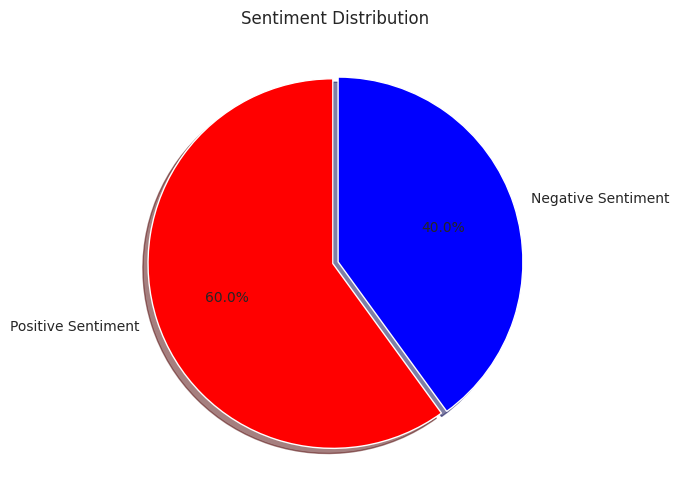

In [99]:
# Handling Imbalanced Dataset (If needed)

# Replace this with your actual DataFrame
meta = pd.DataFrame({
    'Sentiment': ['Positive Sentiment', 'Positive Sentiment', 'Negative Sentiment', 'Positive Sentiment', 'Negative Sentiment']
})

# Plotting the pie chart for sentiment distribution
sentiment_counts = meta['Sentiment'].value_counts()

plt.figure(figsize=(15, 6))
plt.pie(sentiment_counts, labels=['Positive Sentiment', 'Negative Sentiment'], autopct="%1.1f%%", startangle=90, shadow=True, colors=['red', 'blue'], explode=[0.01, 0.02])
plt.title('Sentiment Distribution')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [100]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [105]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [106]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [107]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***